# Final Project

In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display plots in-notebook
%matplotlib inline

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

plt.style.use('fivethirtyeight')

In [2]:
path = 'data/loan.csv'
loan = pd.read_csv(path, low_memory=False)

# Part 1: Problem Statement

I plan to analyze the loan dataset from Lending Club from the year 2007-2015. I plan to identify the characteristics/variables that would lead to a high likelihood of default on the loans.

Since I am trying to predict the likelihood of default I will include variables that one would only know from an application. We will look at how we can predict default using the following variables:
* Income
* Source of income verified vs unverified
* Homeownership
* Employment length
* Length in the credit bureau
* Debt-to-income (DTI)
* Delinquency in the previous 2 years

Once the variables are identified that lead to default/prepayment I will find borrowers that have a high likelihood of defaulting or being charged off and see how much was lost by Lending Club. 

# Part 2: Exploratory Data Analysis

In [3]:
half_count = len(loan) / 2
loan = loan.dropna(thresh=half_count,axis=1)
loan.shape
#dropping columsnw with more than half of values missing

(887379, 53)

In [4]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,171.62,NaN,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,119.66,NaN,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,649.91,NaN,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,357.48,NaN,Jan-2015,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,67.79,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN


In [5]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,...,887379.000000,887379.000000,887379.000000,887379.000000,887234.000000,887379.0,887350.000000,8.171030e+05,8.171030e+05,8.171030e+05
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,...,0.396692,45.919243,4.880757,2164.145585,0.014380,1.0,0.004991,2.257026e+02,1.394582e+05,3.206862e+04
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,...,4.087825,409.693874,63.125281,4794.783233,0.134191,0.0,0.077625,1.031137e+04,1.537500e+05,3.749826e+04
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,...,0.000000,0.000000,0.000000,280.170000,0.000000,1.0,0.000000,0.000000e+00,2.985300e+04,1.390000e+04
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,...,0.000000,0.000000,0.000000,462.780000,0.000000,1.0,0.000000,0.000000e+00,8.055900e+04,2.370000e+04
75%,5.490814e+07,5.847135e+07,20000.000000,20000.000000,20000.000000,16.200000,572.600000,9.000000e+04,23.950000,0.000000,...,0.000000,0.000000,0.000000,831.245000,0.000000,1.0,0.000000,0.000000e+00,2.082050e+05,3.980000e+04
max,6.861706e+07,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,358.680000,33520.270000,7002.190000,36475.590000,20.000000,1.0,14.000000,9.152545e+06,8.000078e+06,9.999999e+06


In [7]:
#removing all columns that do not have relevance to my hypothesis
loan.drop(['id','member_id', 'url', 'issue_d', 'pymnt_plan', 'term', 'issue_d', 'zip_code', 
           'addr_state', 'inq_last_6mths', 'open_acc', 'pub_rec', 
          'initial_list_status', 'out_prncp', 'out_prncp_inv', 
           'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 
          'collections_12_mths_ex_med', 'policy_code','emp_title', 'verification_status',
          'revol_bal', 'revol_util', 'total_pymnt', 'sub_grade', 'recoveries', 'application_type', 
           'total_rev_hi_lim', 'title', 'earliest_cr_line', 'collection_recovery_fee','total_pymnt_inv', 
           'total_rec_prncp', 'total_rec_int','total_rec_late_fee', 'tot_coll_amt', 'tot_cur_bal',
          'acc_now_delinq', 'purpose'],1, inplace=True)
print(loan.shape)
print(loan.columns)

(887379, 13)
Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'loan_status', 'dti', 'delinq_2yrs', 'total_acc'],
      dtype='object')


In [8]:
#checking to see which columns still need to be adjusted by determing their datatypes
print(loan.shape)
loan.info()

(887379, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 13 columns):
loan_amnt          887379 non-null float64
funded_amnt        887379 non-null float64
funded_amnt_inv    887379 non-null float64
int_rate           887379 non-null float64
installment        887379 non-null float64
grade              887379 non-null object
emp_length         842554 non-null object
home_ownership     887379 non-null object
annual_inc         887375 non-null float64
loan_status        887379 non-null object
dti                887379 non-null float64
delinq_2yrs        887350 non-null float64
total_acc          887350 non-null float64
dtypes: float64(9), object(4)
memory usage: 88.0+ MB


# Employee Length Exploration

In [9]:
#years and other symbols should be removed 
loan.loc[:, 'emp_length'].head()

0    10+ years
1     < 1 year
2    10+ years
3    10+ years
4       1 year
Name: emp_length, dtype: object

In [10]:
#removing all nonnumeric characters and droping rows that are NaaN
loan['emp_length'] = loan.emp_length.str.replace(r"[a-zA-Z]",'')
loan['emp_length'] = loan.emp_length.str.replace(r"[^\w]",'')
loan.dropna(subset=['emp_length'], inplace=True)

In [29]:
#converting the row to numeric values
loan.loc[:, "emp_length"] = loan.loc[:, "emp_length"].convert_objects(convert_numeric=False)
loan.loc[:, 'emp_length'].dtype

C:\Users\Kevin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


dtype('int64')

In [12]:
loan_emp_length = loan.emp_length.values
loan.drop('emp_length',axis = 1)
loan_emp_length

array([10,  1, 10, ...,  5,  1, 10], dtype=int64)

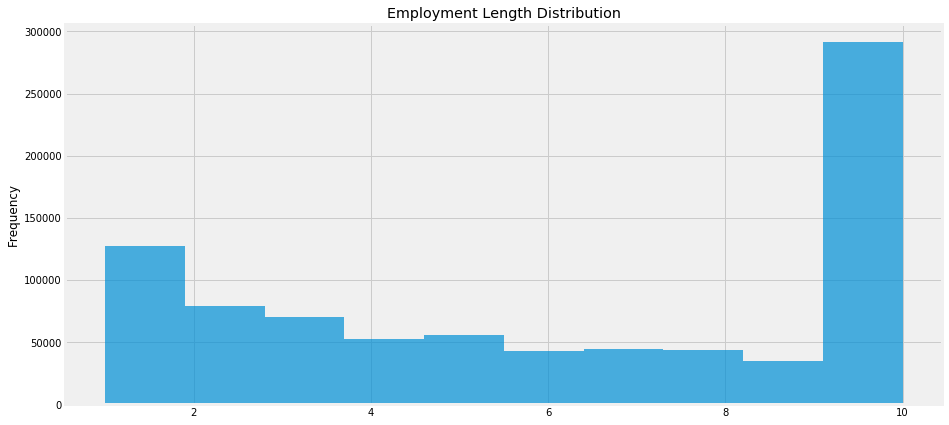

In [13]:
fig, ax = plt.subplots(figsize=(14,7))
pd.Series(loan_emp_length).plot(kind='hist',alpha=.7, bins=10, title='Employment Length Distribution', ax=ax)

# Interest Rate Exploration

In [14]:
loan_int_rate = loan.int_rate.values
loan.drop('int_rate',axis = 1)
loan_int_rate

array([10.65, 15.27, 15.96, ..., 15.99, 19.99, 11.99])

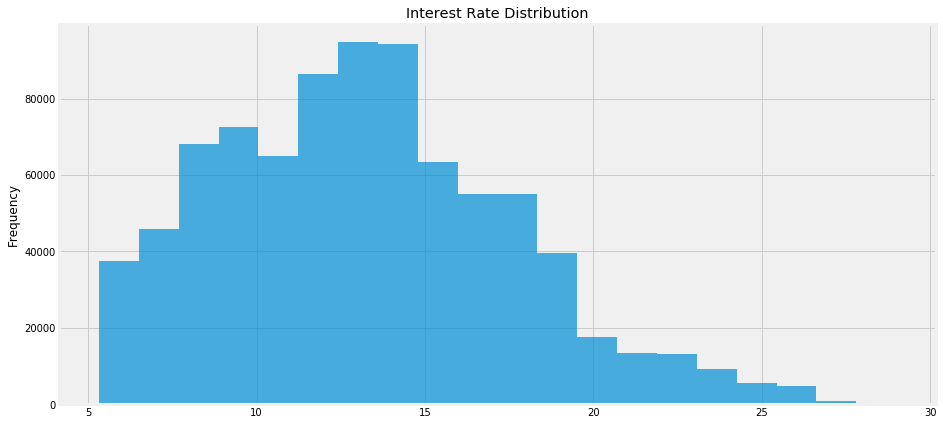

In [15]:
fig, ax = plt.subplots(figsize=(14,7))
pd.Series(loan_int_rate).plot(kind='hist',alpha=.7, bins=20, title='Interest Rate Distribution', ax=ax)

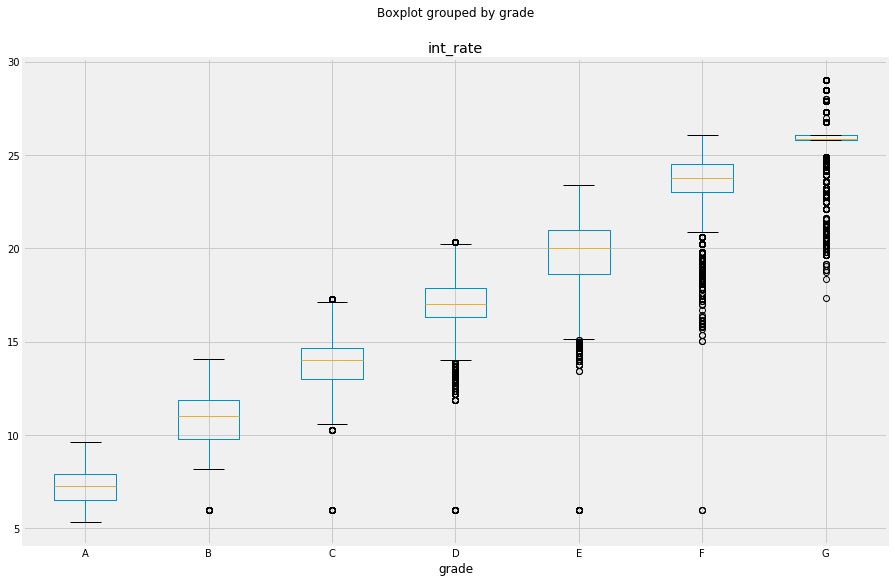

In [79]:
fig, ax = plt.subplots(figsize=(15,9))
e = loan.boxplot(column='int_rate', by='grade', fontsize=10, ax=ax)

# Loan Status Exploration

In [16]:
loan.loan_status.value_counts()

Current                                                568686
Fully Paid                                             200351
Charged Off                                             42723
Late (31-120 days)                                      10872
Issued                                                   7829
In Grace Period                                          6015
Late (16-30 days)                                        2215
Does not meet the credit policy. Status:Fully Paid       1969
Default                                                  1148
Does not meet the credit policy. Status:Charged Off       746
Name: loan_status, dtype: int64

In [17]:
loan = loan[(loan.loc[:,'loan_status'] == 'Fully Paid') | (loan.loc[:, 'loan_status'] == 'Charged Off') | (loan.loc[:, 'loan_status'] == 'Current') | (loan.loc[:, 'loan_status'] == 'Default')]

status_dict = {'loan_status': { "Fully Paid": 1, "Current": 1, "Charged Off": 0, "Default": 0}}
loan = loan.replace(status_dict)

1    768882
0     43838
Name: loan_status, dtype: int64


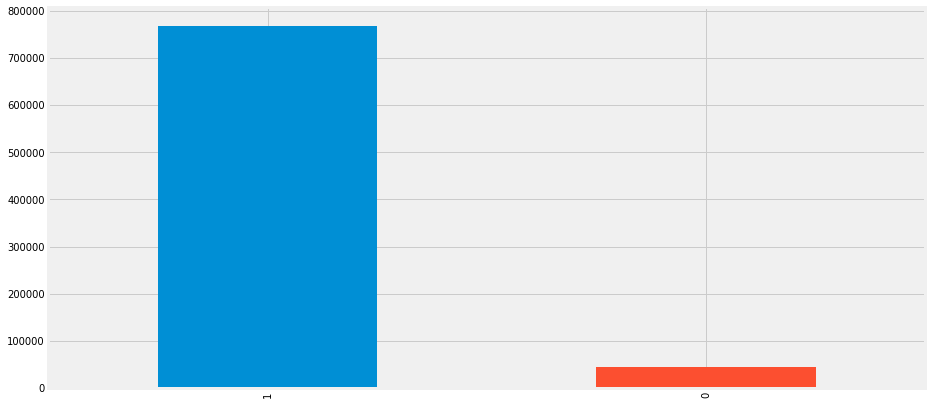

In [81]:
status_amt  = loan.loc[:,'loan_status'].value_counts()
print(str(status_amt))

fig, ax = plt.subplots(figsize=(14,7))

status_amt.plot(kind='bar', ax=ax)

# Home Ownership Exploration

In [19]:
loan.loc[:, 'home_ownership'].value_counts()

MORTGAGE    409125
RENT        327698
OWN          75897
OTHER          141
NONE            44
ANY              3
Name: home_ownership, dtype: int64

In [20]:
loan = loan[(loan.loc[:,'home_ownership'] == 'MORTGAGE') | (loan.loc[:, 'home_ownership'] == 'RENT') |(loan.loc[:, 'home_ownership'] == 'OWN') ]

status_dict = {'home_ownership': { "MORTGAGE": 1, "OWN": 1, "RENT": 0}}
loan = loan.replace(status_dict)

1    485022
0    327698
Name: home_ownership, dtype: int64


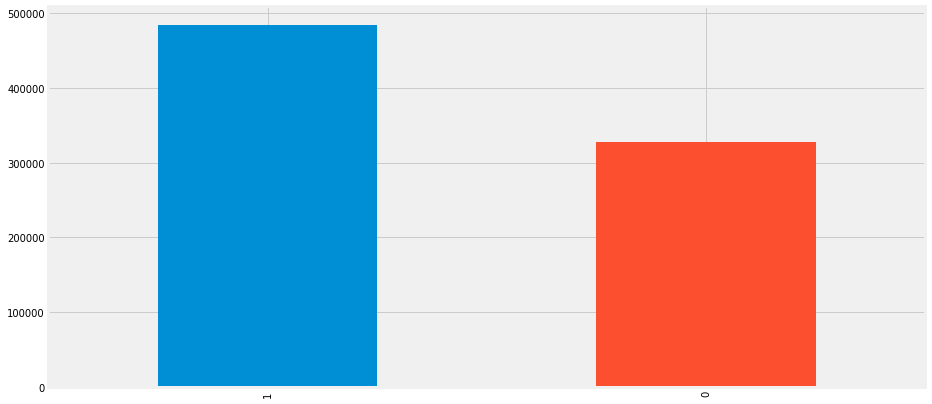

In [21]:
status_amt = loan.loc[:,'home_ownership'].value_counts()
print(str(status_amt))

fig, ax = plt.subplots(figsize=(14,7))

status_amt.plot(kind='bar', ax=ax)

# Loan Amount Exploration

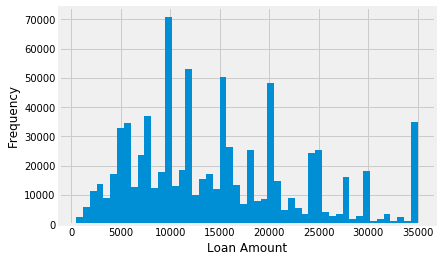

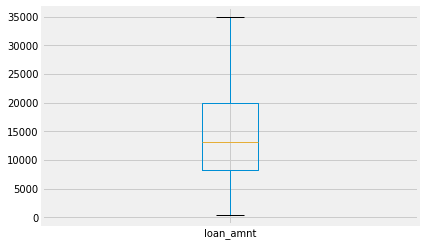

In [75]:
loan['loan_amnt'].hist(bins=50)
plt.ylabel('Frequency')
plt.xlabel('Loan Amount')
plt.show()
q = loan.boxplot(column='loan_amnt')

# Default Data Exploration

In [88]:
loan_default = loan[loan.loc[:, 'loan_status']==0]

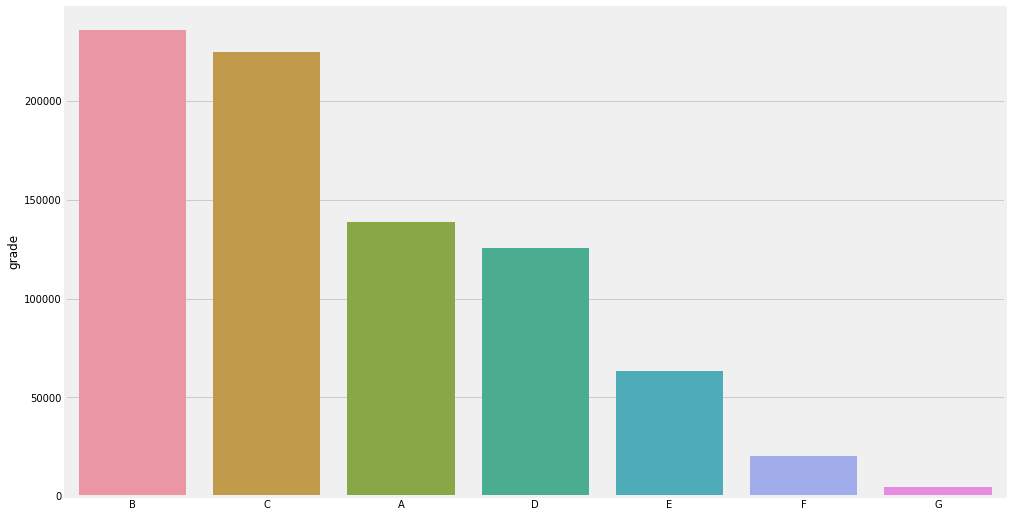

In [25]:
fig, ax = plt.subplots(figsize=(15,9))
sns.barplot(x=loan.grade.value_counts().index, y=loan.grade.value_counts(), ax=ax)

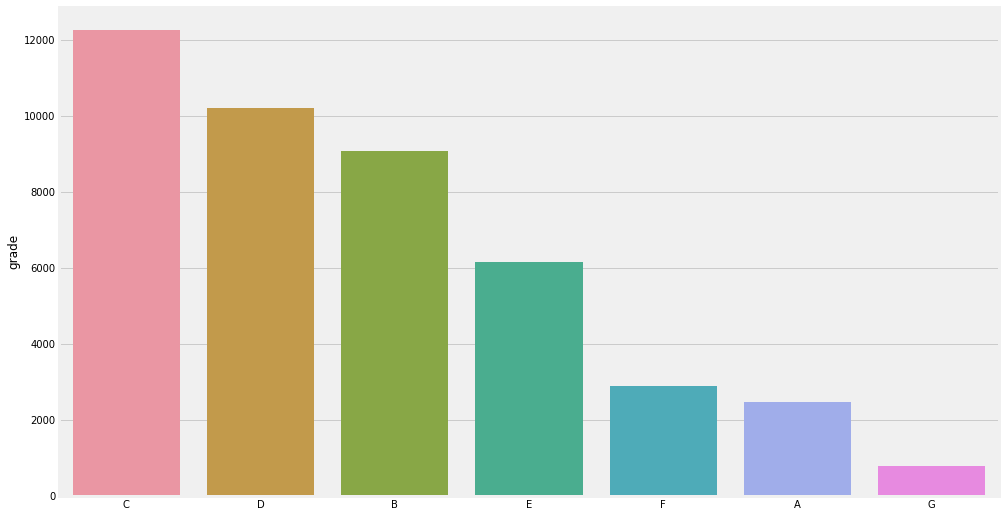

In [85]:
fig, ax = plt.subplots(figsize=(15,9))
sns.barplot(x=loan_default.grade.value_counts().index, y=loan_default.grade.value_counts(), ax=ax)

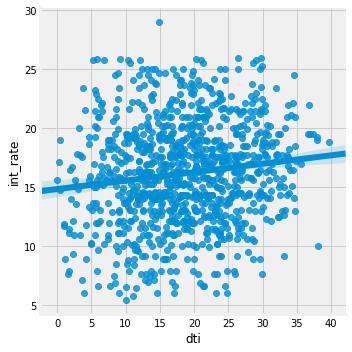

In [87]:
defaultSample = loan_default.sample(1000)
sns.lmplot(x='dti',y='int_rate',data=defaultSample,palette='Set1')

# Data Correlation

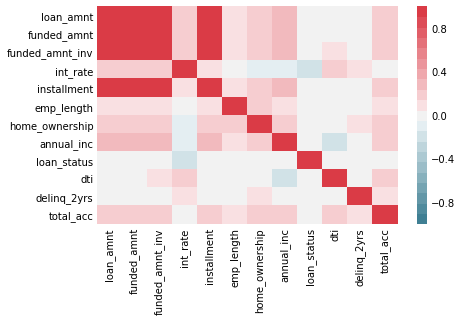

In [24]:
# Visualize correlation matrix in Seaborn using a heat map.
sns.heatmap(loan.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(220, 10, n=21),
            );

In [54]:
#all correlated data
cor = loan.corr()
print(cor)

                 loan_amnt  funded_amnt  funded_amnt_inv  int_rate  \
loan_amnt         1.000000     0.999245         0.997528  0.147476   
funded_amnt       0.999245     1.000000         0.998435  0.147626   
funded_amnt_inv   0.997528     0.998435         1.000000  0.147880   
int_rate          0.147476     0.147626         0.147880  1.000000   
installment       0.944052     0.945109         0.943297  0.133815   
emp_length        0.106187     0.106443         0.107551  0.010441   
home_ownership    0.185198     0.185119         0.185285 -0.059302   
annual_inc        0.327555     0.327348         0.326741 -0.073625   
loan_status       0.003352     0.004266         0.006750 -0.156667   
dti               0.046403     0.047240         0.049158  0.161947   
delinq_2yrs      -0.003207    -0.002874        -0.002358  0.055569   
total_acc         0.219475     0.219422         0.219664 -0.036968   

                 installment  emp_length  home_ownership  annual_inc  \
loan_amnt        

# Part 3: Model Creation

# Train Test Split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
feature_cols = loan.loc[:,['int_rate','installment', 'emp_length', 'home_ownership', 'annual_inc', 'dti', 
                           'delinq_2yrs', 'total_acc']]

X  =  feature_cols
y = loan.loc[:, 'loan_status']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, random_state=123)

C:\Users\Kevin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# Training a Logistic Regression Model

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, model_selection

In [34]:
log_loan = LogisticRegression()
log_loan.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [35]:
log_predictions = log_loan.predict(X_test)
log_score = log_loan.score(X_test, y_test)
print(log_score)
print(log_predictions)

0.9461027988319061
[1 1 1 ... 1 1 1]


In [36]:
# Compare to null model
y_pred_null = np.ones(y_test.shape) * y_train.mean() > .01
metrics.accuracy_score(y_test, y_pred_null)

0.9461027988319061

In [43]:
# Predicts that someone would would pay be current on their payments, but 13,104 defaulted or were charged
default_pred_prob = log_loan.predict_proba(X_test)[:, 1]
y_pred = (default_pred_prob > .001 ).astype(int)
metrics.confusion_matrix(y_test, y_pred)

array([[     0,  13141],
       [     0, 230675]], dtype=int64)

# Training a Decision Tree Model

In [44]:
# Instantiate a DecisionTreeRegressor (with random_state=1).
from sklearn.tree import DecisionTreeRegressor

treereg = DecisionTreeRegressor(random_state=1)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [46]:
treereg.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [47]:
# Use leave-one-out cross-validation (LOOCV) to estimate the RMSE for this model.
from sklearn.model_selection import cross_val_score
treereg = DecisionTreeRegressor(max_depth=1, random_state=1)
scores = cross_val_score(treereg, X_train, y_train, cv=14, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

0.22373818638440748

In [48]:
# List of values to try:
max_depth_range = list(range(1, 11))

# List to store the average RMSE for each value of max_depth:
RMSE_scores = []

# Use LOOCV with each value of max_depth.
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X_train, y_train, cv=14, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

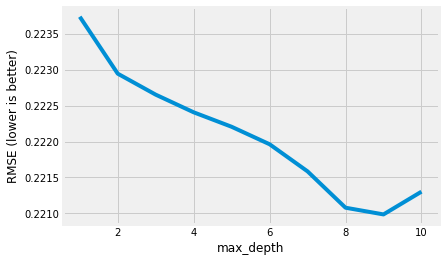

In [49]:
plt.plot(max_depth_range, RMSE_scores);
plt.xlabel('max_depth');
plt.ylabel('RMSE (lower is better)');

In [50]:
treereg = DecisionTreeRegressor(max_depth=9, random_state=1)
scores = cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

0.19662578078645376

In [52]:
treereg = DecisionTreeRegressor(max_depth=9, random_state=1)
treereg.fit(X,y)
y_pred = treereg.predict(X_test)

metrics.mean_squared_error(y_test, y_pred)

0.048214584288620466

#  Training a Random Forest Model

In [69]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=5,random_state=101)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=True, random_state=1,
           verbose=0, warm_start=False)

In [71]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=101, verbose=0, warm_start=False)

In [93]:
rfc_predictions = rfc.predict(X_test)

# Evaluation Models

In [73]:
from sklearn.metrics import classification_report, confusion_matrix

Logistic Model

In [74]:
print('Confusion Matrix:')
print(confusion_matrix(y_test,log_predictions))
print('\n')
print('Classification Report:')
print(classification_report(y_test,log_predictions))

Confusion Matrix:
[[     0  13141]
 [     0 230675]]


Classification Report:
             precision    recall  f1-score   support

          0       0.00      0.00      0.00     13141
          1       0.95      1.00      0.97    230675

avg / total       0.90      0.95      0.92    243816



C:\Users\Kevin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [94]:
print('Confusion Matrix:')
print(confusion_matrix(y_test,rfc_predictions))
print('\n')
print('Classification Report:')
print(classification_report(y_test,rfc_predictions))

Confusion Matrix:
[[   271  12870]
 [  1506 229169]]


Classification Report:
             precision    recall  f1-score   support

          0       0.15      0.02      0.04     13141
          1       0.95      0.99      0.97    230675

avg / total       0.90      0.94      0.92    243816



# Conclusion